# Characterizing a two-state system

Here is full recipy with example code for the characterization of a two-state system. Data must by given is form of a numpy array, or hdf5 file.

## 1. Use SignalSnap to calculate the polyspectra of a measurement

The documenation of SignalSnap can be found [here](https://github.com/MarkusSifft/SignalSnap). Here, we are only providing a working code example.

In [1]:
from signalsnap import SpectrumCalculator, SpectrumConfig, PlotConfig
import numpy as np
import h5py
import matplotlib.pyplot as plt

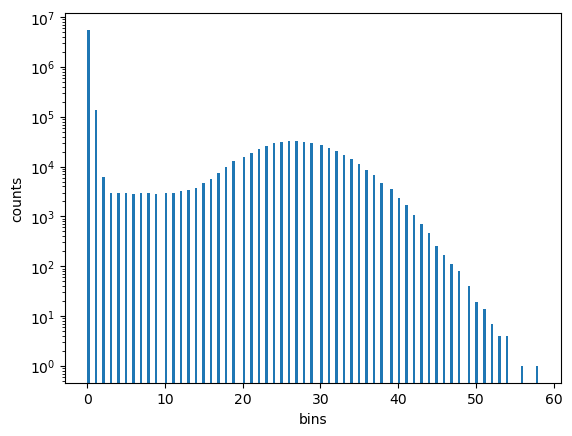

In [3]:
path = 'example_data/long_measurement.h5'
f = h5py.File(path, "r")
group = f['day1']
dataset = group['measurement1'][()]
dataset 

_ = plt.hist(dataset, bins=180)
plt.xlabel('bins')
plt.ylabel('counts')
plt.yscale('log')

Text(0.5, 0, 'time (s)')

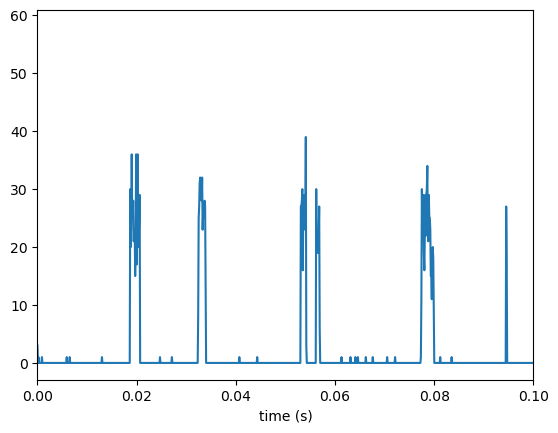

In [10]:
dt = group['measurement1'].attrs['dt'] # sampling time in seconds 
t = np.arange(0,dataset.shape[0]) * dt
plt.plot(t, dataset)
plt.xlim([0,0.1])
plt.xlabel('time (s)')

T_window: 1.245e-01 s
Maximum frequency: 4.996e+03 Hz


  0%|          | 0/248 [00:00<?, ?it/s]

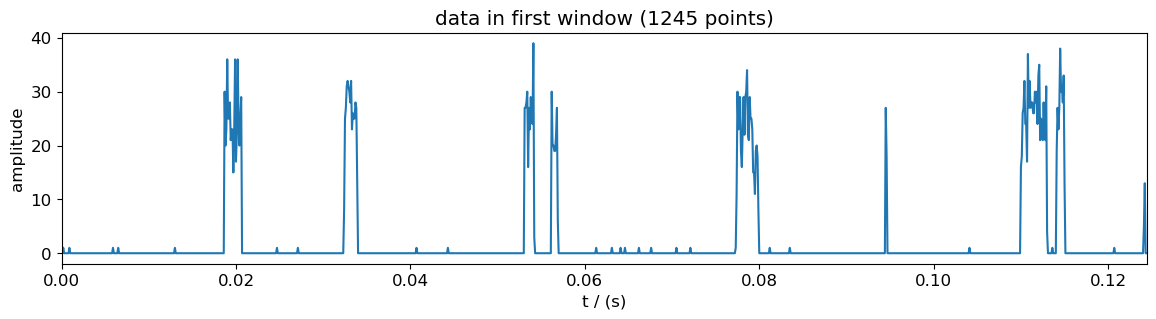

In [13]:
path = 'example_data/long_measurement.h5'
group_key = 'day1'
dataset = 'measurement1'

config = SpectrumConfig(dataset=dataset, group_key=group_key, path=path, f_unit='Hz', 
                        spectrum_size=250, m=20, m_var=10, f_max=2000, order_in=[1,2,3,4], 
                        backend='cpu')

spec = SpectrumCalculator(config)

f, s, serr = spec.calc_spec()

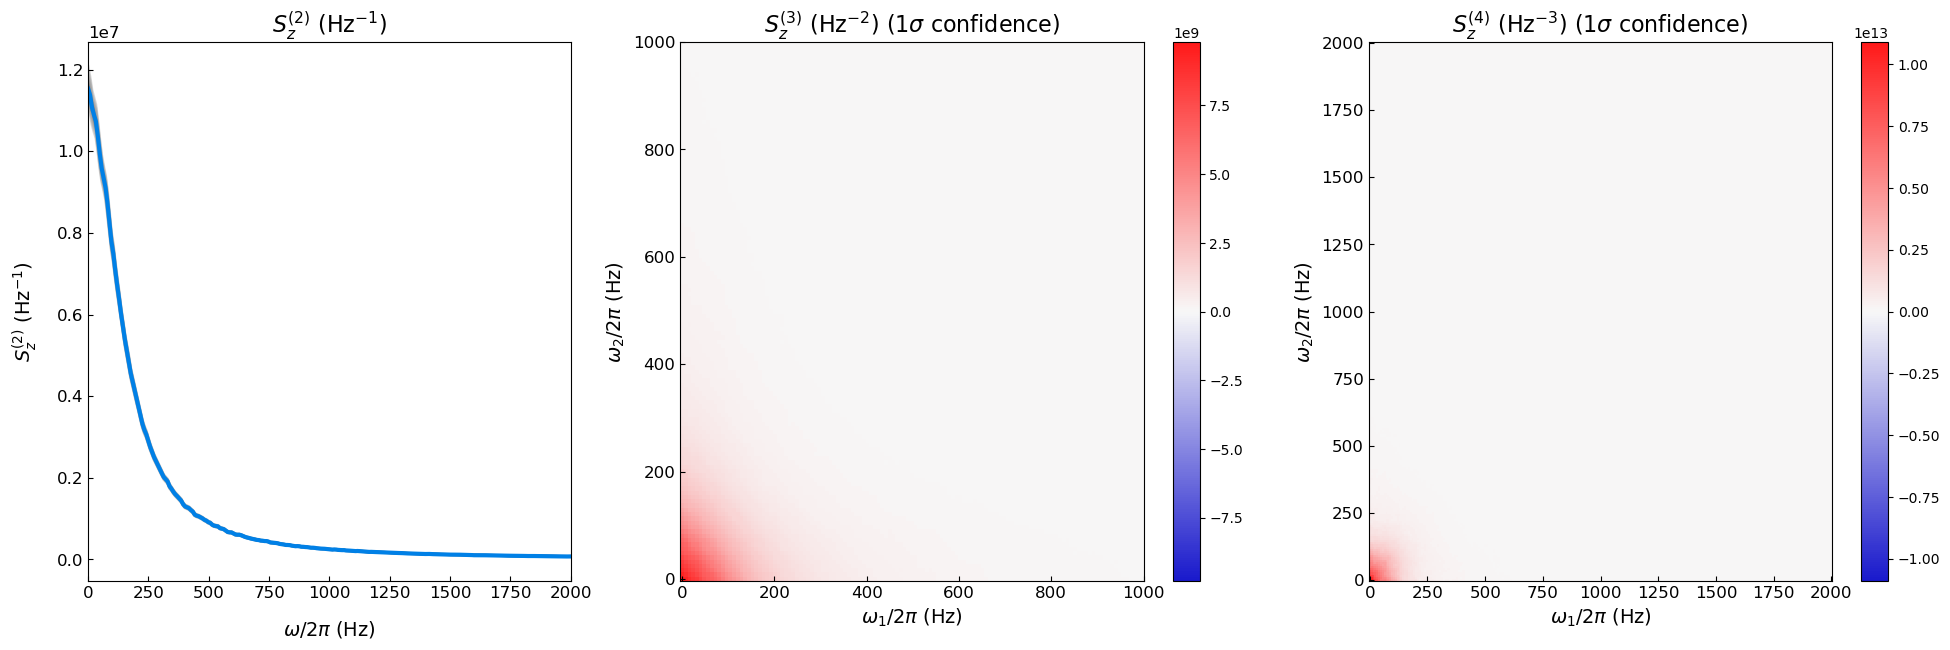

In [14]:
plot_config = PlotConfig(plot_orders=[2,3,4], arcsinh_plot=False, arcsinh_const=0.0002)
fig = spec.plot(plot_config)

In [15]:
path = 'example_data/two_state_example_spectra.pkl'
spec.save_spec(path, remove_S_stationarity=True)